Lessons:

When you want to add a specific value like an array to a cell you can use df.at(index, column) = [1,2,3]

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import MultiLineString, LineString
from shapely.geometry import Point
from shapely.ops import unary_union
import leafmap

import networkx as nx
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

In [2]:
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')
display(ta_q.crs)
ta_q

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,oidrova,krova,dateimport,ShapeArea,geometry
0,1,1,01/12/2015 02:28:14,1.301654e+07,"POLYGON ((670795.655 3555762.452, 670797.577 3..."
1,2,2,01/12/2015 02:28:14,8.013404e+06,"POLYGON ((672021.029 3553364.492, 672014.690 3..."
2,3,3,01/12/2015 02:28:14,3.380430e+06,"POLYGON ((668311.070 3552547.701, 668311.229 3..."
3,4,4,01/12/2015 02:28:14,4.510255e+06,"POLYGON ((670771.828 3552544.564, 670771.584 3..."
4,5,6,01/12/2015 02:28:14,2.089044e+06,"POLYGON ((668160.048 3550196.192, 668162.425 3..."
5,6,9,01/12/2015 02:28:14,7.879856e+06,"POLYGON ((668811.121 3546980.368, 668808.698 3..."
6,7,5,01/12/2015 02:28:14,3.024297e+06,"POLYGON ((666698.783 3550619.396, 666701.339 3..."
7,8,8,01/12/2015 02:28:14,3.420996e+06,"POLYGON ((667954.133 3548820.374, 667956.725 3..."
8,9,7,01/12/2015 02:28:14,6.343551e+06,"POLYGON ((665854.540 3548193.053, 665868.137 3..."


In [3]:
# Exclude micro mobility
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23
micro_m = [SCOOTER, E_BICYCLE, BICYCLE]


In [4]:
# Load original accident data
i_m_h_ta_gdf = gpd.read_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

In [5]:
# Accidents that are not MM
i_m_h_ta_no_mm_gdf = i_m_h_ta_gdf[~(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].copy()

In [6]:
# Accidents that are just MM
i_m_h_ta_mm_gdf =  gpd.read_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')
display(i_m_h_ta_mm_gdf.crs)
i_m_h_ta_mm_gdf.head(5)

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date,geometry
41,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-07-27 01:00:00,POINT (667544.749 3549959.961)
50,2013001742,32013001742,3,3,2,נהג נפגע,0,7,30-34,2,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-10-07 01:30:00,POINT (667286.918 3548726.540)
131,2013001350,12013001350,1,1,2,נהג נפגע,0,5,20-24,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-08-25 01:00:00,POINT (667023.688 3548785.170)
196,2013000147,12013000147,1,1,2,נהג נפגע,0,8,35-39,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,2.0,בינוני,9110323.0,2013-09-19 00:00:00,POINT (668158.751 3551284.678)
197,2013000147,12013000147,1,1,2,נהג נפגע,0,6,25-29,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,2.0,בינוני,9110323.0,2013-09-19 00:00:00,POINT (668158.751 3551284.678)


In [7]:
bp_ta_bp_and_meta = gpd.read_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')
bp_ta_bp_and_meta.head(5)

,oid_shvil,msorech,dateimport,create_year,shemmikta,create_date,geometry,width,direction,bitzua,miflas,date_created
0,1,95.10,14/08/2024 02:30:05,2012,נמיר מיוניצ'מן דרומה,None,"LINESTRING (669823.985 3557373.860, 669855.549...",2.5,דו סטרי,2012,None,None
1,2,201.14,14/08/2024 02:30:05,2013,פרופס מנמיר עד קדושי השואה,None,"LINESTRING (669232.834 3555478.027, 669169.381...",2.5,דו סטרי,2013,None,None
2,3,696.31,14/08/2024 02:30:05,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,"LINESTRING (669232.637 3555478.023, 669249.025...",2.1,דו סטרי,2004,None,None
3,4,659.20,14/08/2024 02:30:05,2018,"קק""ל מנמיר עד חיים לבנון",None,"LINESTRING (669354.261 3555417.055, 669410.178...",2.5,דו סטרי,2018,מדרכה,None
4,5,362.67,14/08/2024 02:30:05,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,"LINESTRING (669946.350 3555344.516, 669962.261...",2.0,דו סטרי,2018,None,30/06/2018


In [8]:
ta_streets = gpd.read_file('./csv_tables/TA_streets_20240724_031704/Streets.shp')
ta_streets

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
0,1.0,915.0,הרוגי מלכות,HARUGEY MALKHOT,336.0,רחוב,0.0,507-10001,قتل مملكة,100.0,"LINESTRING (672865.880 3554095.253, 672895.216..."
1,2.0,0.0,0,UKNOWN,0.0,רחוב,3.0,507-10002,None,100.0,"LINESTRING (666990.498 3551436.940, 667065.337..."
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (667879.712 3551424.162, 667940.741..."
3,4.0,644.0,אלון יגאל,YIG'AL ALLON,2524.0,רחוב,0.0,507-10004,ألون ييغال,200.0,"LINESTRING (669570.036 3550420.535, 669581.404..."
4,5.0,634.0,מרגולין,MARGOLIN,2649.0,רחוב,1.0,507-10005,مارغولين,100.0,"LINESTRING (669329.153 3548322.758, 669409.403..."
...,...,...,...,...,...,...,...,...,...,...,...
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,"LINESTRING (665771.816 3547023.159, 665760.256..."
8875,9852.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20562,Avinri Yitzhak,100.0,"LINESTRING (665585.719 3547178.152, 665627.936..."
8876,9853.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20563,Avinri Yitzhak,100.0,"LINESTRING (665700.142 3547064.296, 665759.119..."
8877,9855.0,3907.0,3907,None,1703.0,רחוב,0.0,507-21960,3907,100.0,"LINESTRING (665087.059 3546677.092, 665075.120..."


### Creating Crossroad data

#### Loading crosswalk data:

Removing participants in the same accidents so we don't have more accidents.

Later we will analyze all participants when we want to check severity.

In [9]:
# i_m_h_ta_mm_gdf_ = i_m_h_ta_mm_gdf.drop_duplicates(subset=['provider_and_id'])
# i_m_h_ta_mm_gdf_ = i_m_h_ta_mm_gdf_[i_m_h_ta_mm_gdf_.location_accuracy == 1]

# i_m_h_ta_mm_gdf_.shape

### Create Crossroad Name

In [10]:
# # import geopandas as gpd

# def process_trechov_combination(ta_streets, combined_polygons):
#     # Step 1: Perform a spatial join
#     joined = gpd.sjoin(ta_streets, combined_polygons, how="inner", predicate="intersects")
    
#     # Step 2: Group by index of combined_polygons and collect `trechov` names
#     trechov_grouped = joined.groupby('index_right')['trechov'].apply(
#         lambda trechovs: list(set(trechovs))  # Deduplicate `trechov` names
#     )
    
#     # Step 3: Add the combined `trechov` and count back to combined_polygons
#     combined_polygons['combined_trechov'] = combined_polygons.index.map(trechov_grouped)
#     combined_polygons['combined_trechov'] = combined_polygons['combined_trechov'].apply(
#         lambda x: x if x is not None else []  # Handle polygons with no matches
#     )
    
#     # Step 4: Add the count of unique `trechov` names
#     combined_polygons['num_trechov'] = combined_polygons['combined_trechov'].apply(len)
    
#     return combined_polygons

# # Example usage
# resulting_combined_polygons = process_trechov_combination(ta_streets, combined_polygons[['geometry','geo_length']].copy())

# # Display the updated GeoDataFrame
# # import ace_tools as tools; tools.display_dataframe_to_user(name="Polygons with Combined Trechov Data", dataframe=resulting_combined_polygons)
# resulting_combined_polygons

Fixing *combined_trechov*

In [11]:
# crossroads_buff['combined_trechov'] = crossroads_buff.combined_trechov.apply(lambda x: ','.join(x) )
# crossroads_buff['combined_trechov']

We see issues with our map, "קיבוץ גלויות" is a two way street but only one line string, when connecting to other streets it creates a connection that is missing the real street connections.

Hence the crossroads are misaligned. 

---

Trying Open Street Map

In [12]:
G = ox.graph_from_place("Tel Aviv, Israel", network_type="drive")

In [13]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
os_ta_streets_nodes, os_ta_streets_edges = ox.graph_to_gdfs(G)

os_ta_streets_nodes = os_ta_streets_nodes.to_crs('32636')
os_ta_streets_edges = os_ta_streets_edges.to_crs('32636')

display(os_ta_streets_nodes.head(3)), os_ta_streets_nodes.shape

,y,x,highway,street_count,ref,geometry
osmid,,,,,,
139693,32.093840,34.790572,traffic_signals,4,NaN,POINT (668968.683 3552240.237)
139698,32.093869,34.791231,NaN,3,NaN,POINT (669030.815 3552244.552)
139707,32.095354,34.778500,NaN,3,NaN,POINT (667826.578 3552389.242)


(None, (6488, 6))

In [14]:
os_ta_streets_nodes = os_ta_streets_nodes.reset_index()
os_ta_streets_nodes

,osmid,y,x,highway,street_count,ref,geometry
0,139693,32.093840,34.790572,traffic_signals,4,NaN,POINT (668968.683 3552240.237)
1,139698,32.093869,34.791231,NaN,3,NaN,POINT (669030.815 3552244.552)
2,139707,32.095354,34.778500,NaN,3,NaN,POINT (667826.578 3552389.242)
3,139708,32.095052,34.778329,NaN,3,NaN,POINT (667810.983 3552355.494)
4,139709,32.094527,34.778842,NaN,4,NaN,POINT (667860.387 3552298.098)
...,...,...,...,...,...,...,...
6483,12292683832,32.062786,34.785004,NaN,1,NaN,POINT (668500.151 3548788.711)
6484,12292683834,32.063149,34.785276,traffic_signals,3,NaN,POINT (668525.204 3548829.326)
6485,12361383714,32.057552,34.763578,NaN,1,NaN,POINT (666486.760 3548175.193)
6486,12361652364,32.054494,34.771553,NaN,1,NaN,POINT (667245.361 3547848.419)


In [15]:
os_ta_streets_edges = os_ta_streets_edges.reset_index()
display(os_ta_streets_edges.head(3)), os_ta_streets_edges.shape

,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,maxspeed,lanes,ref,access,tunnel,bridge,junction,width
0,139693,5723720351,0,5118378,True,ויצמן,tertiary,False,4.370,"LINESTRING (668968.683 3552240.237, 668968.629...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,139693,139698,0,167691710,True,יהודה המכבי,tertiary,False,62.173,"LINESTRING (668968.683 3552240.237, 668972.601...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,139698,139723,0,167691710,True,יהודה המכבי,tertiary,False,110.029,"LINESTRING (669030.815 3552244.552, 669082.911...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(None, (12451, 18))

#### Dropping u v duplicates:

In [16]:
os_ta_streets_nodes.duplicated(subset='osmid').sum()

0

In [17]:
os_ta_streets_edges.duplicated(subset=['u','v']).sum()

54

In [18]:
os_ta_streets_edges = os_ta_streets_edges.drop_duplicates(subset=['u','v'])
# os_ta_streets_nodes = os_ta_streets_nodes.drop_duplicates(subset=['u','v'])


#### Some street names and osmid are list, so adding a column of type for better filtering

In [19]:
os_ta_streets_edges['name_type'] = os_ta_streets_edges.name.apply(type).astype(str)

os_ta_streets_edges['osmid_type'] = os_ta_streets_edges.osmid.apply(type).astype(str)
os_ta_streets_edges.name_type.value_counts(), os_ta_streets_edges.osmid_type.value_counts()

(name_type
 <class 'str'>      10858
 <class 'float'>     1287
 <class 'list'>       252
 Name: count, dtype: int64,
 osmid_type
 <class 'int'>     11568
 <class 'list'>      829
 Name: count, dtype: int64)

All street names that are float are NaNs

### Plan for roundabout and crossroads:
I am going to recreate the crossroads.

The general plan:
* [ ] there are roundabouts that are not accounted for

**Creating Crossroads**
1. [ ] create small crossroads, 5 meters for the edges.
3. [ ] Combining related crossroads:
    * if 2 crossroads share more than 1 **street name** then these crossroads are part of the same crossroad and need to be merged.
    * if the crossroads share only one street, check if it's a connector:
        * no: try different distances to make sure there is logic is combining them.
        * yes: the distance doesn't matter so they can be merged

In [20]:
os_ta_streets_edges[os_ta_streets_edges.junction == 'roundabout'].shape

(505, 20)

## Handling Roundabout

There are currently 505 row categorized as roundabout

### Locating missing roundabouts

Where am I looking:

1. [X] edges that are **NOT** considered roundabout <br>
    
    * [X] name **NOT** na **AND** name type **NOT** ```<class 'list'>```<br>
        
    * [X] name **IS** na **AND** osmid type **IS** ```<class 'list'>```<br>
        
    * [X] name **IS** na **AND** osmid type **NOT** ```<class 'list'>```<br>
        

#### Helper function to check if a linestring are closed loop

If yes then in higher probability they are a roundabout.<br>
Will plot to make sure.

In [21]:
def is_group_closed(group):
    """
    Check if the LineStrings in a group form a closed loop.
    :param group: A GeoSeries of LineStrings
    :return: True if connected and closed, False otherwise
    """
    # Combine all LineStrings in the group into a MultiLineString
    # combined = group.buffer(0.5).tolist()
    
    # Use unary_union to merge all geometries into a single geometry
    merged = unary_union(group.buffer(0.5).tolist())
    
    # Check if the merged geometry is a single LineString and is closed
    return hasattr(merged, 'interiors') and (len(merged.interiors) > 0)

#### name **NOT** na **AND** name type **IS** ```<class 'list'>``` <br>

In [22]:
name_str_nametype_list_edges = os_ta_streets_edges[(os_ta_streets_edges.junction != 'roundabout') &
                                                  (~os_ta_streets_edges.name.isna()) &
                                                  (os_ta_streets_edges.name_type == "<class 'list'>") 
                                                  ]
name_str_nametype_list_edges.shape

(252, 20)

In [23]:
name_str_nametype_list_edges_cp = name_str_nametype_list_edges.copy()
name_str_nametype_list_edges_cp['name'] = name_str_nametype_list_edges_cp['name'].apply(lambda x: str(x) if isinstance(x, list) else x)

res = name_str_nametype_list_edges_cp.groupby('name').apply(is_group_closed)
res.sum()

1

In [24]:
m = leafmap.Map(center=(32.047, 34.785), zoom=11)
m.add_gdf(name_str_nametype_list_edges_cp)
m.add_gdf(name_str_nametype_list_edges_cp[name_str_nametype_list_edges_cp.name.isin(res[res].index)], zoom_to_layer=True, fill_colors='black')

m

Map(center=[32.047, 34.785], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

Found no roundabout in **name_str_nametype_list_edges**

#### name **NOT** na **AND** name type **NOT** ```<class 'list'>```<br>

This is most of the edges

In [25]:
name_str_nametype_rest_edges = os_ta_streets_edges[(os_ta_streets_edges.junction != 'roundabout') &
                                                  (~os_ta_streets_edges.name.isna()) &
                                                  ~(os_ta_streets_edges.name_type == "<class 'list'>") 
                                                  ]
name_str_nametype_rest_edges.shape

(10811, 20)

In [26]:
res = name_str_nametype_rest_edges.groupby('name').apply(is_group_closed)
res.sum()

58

In [27]:
m = leafmap.Map(center=(32.047, 34.785), zoom=11)
m.add_gdf(name_str_nametype_rest_edges)
m.add_gdf(name_str_nametype_rest_edges[name_str_nametype_rest_edges.name.isin(res[res].index)], zoom_to_layer=True, fill_colors='black')

m

Map(center=[32.047, 34.785], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

We see 3 edges that have been missed.
* רביבים
* כיכר איסר הראל
* כיכר המלך אלברט

#### name **IS** na **AND** osmid type **IS** ```<class 'list'>```<br>

In [28]:
name_na_osmidtype_list_edges = os_ta_streets_edges[(os_ta_streets_edges.junction != 'roundabout') &
                                                  (os_ta_streets_edges.name.isna()) &
                                                  (os_ta_streets_edges.osmid_type == "<class 'list'>") 
                                                  ]
name_na_osmidtype_list_edges.shape

(62, 20)

In [29]:
m = leafmap.Map(center=(32.047, 34.785), zoom=11)
m.add_gdf(name_na_osmidtype_list_edges, fill_colors='black')
m

Map(center=[32.047, 34.785], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

No roundabout.<br>

There are some other issues.

* Some of the osmid list are actually connector but with a split such as: [408943846, 28941694]
* [660595707, 454564565], is a connector, not sure why osmid has 2.

There are more with issues will go through them later.

#### name **IS** na **AND** osmid type **NOT** ```<class 'list'>```<br>

In [30]:
name_na_osmidtype_rest_edges = os_ta_streets_edges[(os_ta_streets_edges.junction != 'roundabout') &
                                                  (os_ta_streets_edges.name.isna()) &
                                                  ~(os_ta_streets_edges.osmid_type == "<class 'list'>") 
                                                  ]
name_na_osmidtype_rest_edges.shape

(767, 20)

In [31]:
res = name_na_osmidtype_rest_edges.groupby('osmid').apply(is_group_closed)
res.sum()

6

In [32]:
m = leafmap.Map(center=(32.047, 34.785), zoom=11)
m.add_gdf(name_na_osmidtype_rest_edges)
m.add_gdf(name_na_osmidtype_rest_edges[name_na_osmidtype_rest_edges.osmid.isin(res[res].index)], fill_colors='black')

m

Map(center=[32.047, 34.785], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

Found no roundabout

#### Conclusion of locating missing roundabout

There are in total 3 roundabouts that haven't been missed.

* רביבים
* כיכר איסר הראל
* כיכר המלך אלברט



### Changing missed roundabouts

In [33]:
os_ta_streets_edges[os_ta_streets_edges.name == 'כיכר המלך אלברט']

,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,maxspeed,lanes,ref,access,tunnel,bridge,junction,width,name_type,osmid_type
2123,384636414,384637410,0,473287488,True,כיכר המלך אלברט,residential,False,8.906,"LINESTRING (667529.784 3549128.195, 667526.615...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'int'>
2125,384636415,384637413,0,33626593,False,כיכר המלך אלברט,residential,True,9.028,"LINESTRING (667548.495 3549121.672, 667544.577...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'int'>
2126,384636415,384636414,0,"[473287488, 473287489]",True,כיכר המלך אלברט,residential,False,19.787,"LINESTRING (667548.495 3549121.672, 667530.810...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'list'>
2127,384637410,384637413,0,473287488,True,כיכר המלך אלברט,residential,False,19.019,"LINESTRING (667526.615 3549119.892, 667544.577...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'int'>
2130,384637413,384636415,0,33626593,False,כיכר המלך אלברט,residential,False,9.028,"LINESTRING (667544.577 3549113.556, 667548.495...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'int'>


We have an extra segment in row 2130 that just repeats 2125.

So drop 2130 and change 2125 osmid to 473287488
and change 2126 osmid to 473287488

In [34]:
os_ta_streets_edges.drop(index=[2130], inplace=True)

In [35]:
missed_ra_idx = os_ta_streets_edges[os_ta_streets_edges.name.isin(['כיכר המלך אלברט','כיכר איסר הראל','רביבים'])].index

os_ta_streets_edges.loc[missed_ra_idx, 'junction'] = 'roundabout'

In [36]:
os_ta_streets_edges.loc[2126,'osmid'] = 473287489
os_ta_streets_edges.loc[2125,'osmid'] = 473287488


In [37]:
os_ta_streets_edges[os_ta_streets_edges.name == 'כיכר המלך אלברט']


,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,maxspeed,lanes,ref,access,tunnel,bridge,junction,width,name_type,osmid_type
2123,384636414,384637410,0,473287488,True,כיכר המלך אלברט,residential,False,8.906,"LINESTRING (667529.784 3549128.195, 667526.615...",NaN,NaN,NaN,NaN,NaN,NaN,roundabout,NaN,<class 'str'>,<class 'int'>
2125,384636415,384637413,0,473287488,False,כיכר המלך אלברט,residential,True,9.028,"LINESTRING (667548.495 3549121.672, 667544.577...",NaN,NaN,NaN,NaN,NaN,NaN,roundabout,NaN,<class 'str'>,<class 'int'>
2126,384636415,384636414,0,473287489,True,כיכר המלך אלברט,residential,False,19.787,"LINESTRING (667548.495 3549121.672, 667530.810...",NaN,NaN,NaN,NaN,NaN,NaN,roundabout,NaN,<class 'str'>,<class 'list'>
2127,384637410,384637413,0,473287488,True,כיכר המלך אלברט,residential,False,19.019,"LINESTRING (667526.615 3549119.892, 667544.577...",NaN,NaN,NaN,NaN,NaN,NaN,roundabout,NaN,<class 'str'>,<class 'int'>


In [38]:
os_ta_streets_edges[os_ta_streets_edges.name.isin(['כיכר המלך אלברט','כיכר איסר הראל','רביבים'])].shape

(15, 20)

In [39]:
os_ta_streets_edges[os_ta_streets_edges.junction == 'roundabout'].shape

(520, 20)

### How many of the roundabout have no name?

In [40]:
os_ta_streets_edges[(os_ta_streets_edges.junction == 'roundabout') & (os_ta_streets_edges.name.isna())].shape

(458, 20)

### Handling roundabout naming

I need to get all the street names of each roundabout that has no name.<br>
Then check all the streets that intersect each roundabout and get their names<br>
Take from all the names 2.<br>
Add to the column nam כיכר סטריט1 וסטריט2


In [41]:
# filter for junction=='roundabout' and turn to a separate df
os_ta_roundabouts = os_ta_streets_edges[os_ta_streets_edges.junction == 'roundabout'].copy()
os_ta_roundabouts.osmid.nunique()

130

### turn the roundabouts linestring to a polygon

In [42]:
# Step 1: Buffer and create roundabout polygons
roundabouts = os_ta_streets_edges[os_ta_streets_edges.junction == 'roundabout'].copy()
roundabouts['geometry'] = roundabouts.buffer(4)
roundabouts_geometry = unary_union(roundabouts.geometry)

# Create polygons GeoDataFrame
roundabouts_poly = gpd.GeoDataFrame(geometry=[roundabouts_geometry], crs=roundabouts.crs)
roundabouts_poly = roundabouts_poly.explode(index_parts=True).reset_index(drop=True)

# Step 2: Assign unique IDs to roundabout polygons
roundabouts_poly['poly_id'] = roundabouts_poly.index

# Step 3: Spatial join to associate edges with polygons
edges_with_polygons = gpd.sjoin(roundabouts, roundabouts_poly, how='inner', predicate='intersects')

# Step 4: Analyze or group information
# Example: For each polygon, find the first edge's data
roundabouts_with_info = (
    edges_with_polygons.groupby('poly_id')
    .first()  # Select the first edge information for each polygon
    .reset_index()
)

# View the resulting dataframe
roundabouts_with_info['geometry'] = roundabouts_poly.geometry
roundabouts_with_info


,poly_id,u,v,key,osmid,oneway,name,highway,reversed,length,...,lanes,ref,access,tunnel,bridge,junction,width,name_type,osmid_type,index_right
0,0,318177901,1716729694,0,159555091,True,None,tertiary,False,1.317,...,None,None,None,None,None,roundabout,None,<class 'float'>,<class 'int'>,0
1,1,6952780428,6952780430,0,742719147,True,None,tertiary,False,20.654,...,None,None,None,None,None,roundabout,None,<class 'float'>,<class 'int'>,1
2,2,1283949630,1283949681,0,113140773,True,None,tertiary,False,10.751,...,None,None,None,None,None,roundabout,None,<class 'float'>,<class 'int'>,2
3,3,8589321882,8589321892,0,925514478,True,None,residential,False,16.055,...,None,None,None,None,None,roundabout,None,<class 'float'>,<class 'int'>,3
4,4,1458945605,1458945625,0,132638933,True,None,residential,False,37.276,...,None,None,None,None,None,roundabout,None,<class 'float'>,<class 'int'>,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,111,354047338,354058549,0,31651913,True,None,tertiary,False,18.347,...,None,None,None,None,None,roundabout,None,<class 'float'>,<class 'int'>,111
112,112,414720184,414720184,0,35373026,True,None,residential,False,43.276,...,None,None,None,None,None,roundabout,None,<class 'float'>,<class 'int'>,112
113,113,354045769,803481930,0,31651960,True,None,residential,False,8.331,...,None,None,None,None,None,roundabout,None,<class 'float'>,<class 'int'>,113
114,114,10907653669,11267492245,0,1173903897,True,None,residential,False,14.612,...,None,None,None,None,None,roundabout,None,<class 'float'>,<class 'int'>,114


Found a problem in some roundabouts where some edges are not in the right osmid or their junction categorization is not a roundabout.

In [43]:

np.setdiff1d(os_ta_roundabouts.osmid.unique(), roundabouts_with_info.osmid.unique())

array([412043919, 473287489, 912644177, 912644178, 1134738133, 1134738134,
       1134738136, 1134836535, 1134836536, 1134836537, 1134846865,
       1134846868, 1284672741, 1284672742], dtype=object)

The difference is that some roundabout had more then one osmid and when preforming the polygon creation we lost some of them, but the shape is the same.

#### take the rest of the edges and break them to separate df

In [44]:
os_ta_streets_no_ra_edges = os_ta_streets_edges[os_ta_streets_edges.junction != 'roundabout'].copy()
os_ta_streets_no_ra_edges.shape

(11876, 20)

In [ ]:
# returns list that will be used to to determine overlapping edges in roundabout
def iter_group_list(group):
    ls = []
    for item in group:
        if isinstance(item,list):
            for i in item:
                if not pd.isna(i):
                    ls.append(i)
        else:
            if not pd.isna(item):
                ls.append(item)
    return list(set(ls))


In [46]:
# Add the new columns with default empty list values
os_ta_streets_edges['overlapping_names'] = ''
os_ta_streets_edges['overlapping_osmids'] = ''

In [ ]:
# the final overlappign information will be as string, since it's easier to work with
def turn_to_str(ls):
    ls = list(set(ls))
    str_ls = []
    for item in ls:
        str_item = str(item)
        str_ls.append(str_item)
    return ' ,'.join(str_ls)

In [ ]:
# can't sjoin if I already have index_right
roundabouts_with_info.drop(columns=['index_right'], inplace=True)

### Adding to os_ta_street_edges the overlapping information

In [ ]:
overlap = gpd.sjoin(os_ta_streets_edges, roundabouts_with_info, how='inner', predicate='intersects')

# Step 3: Group by `osmid_right` and aggregate `osmid_left` and `name_left` into lists, flattening nested lists
grouped_overlap = overlap.groupby('osmid_right').agg({
    'osmid_left': iter_group_list,  # Flatten nested lists or handle single values
    'name_left': iter_group_list   # Same logic for name_left
}).reset_index()

for idx,row  in grouped_overlap.iterrows():
    osmid          = row['osmid_right']
    overlap_osmids = row['osmid_left']
    overlap_names  = row['name_left']

    osmid_mask = os_ta_streets_edges[os_ta_streets_edges.osmid == osmid].index
    for idx_os in osmid_mask:
        os_ta_streets_edges.at[idx_os, 'overlapping_names']  = turn_to_str(overlap_names)
        os_ta_streets_edges.at[idx_os, 'overlapping_osmids'] = turn_to_str(os_ta_streets_edges[(os_ta_streets_edges.osmid.isin(overlap_osmids)) & (os_ta_streets_edges.junction == 'roundabout')].osmid.to_list())


os_ta_streets_edges.head()


,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,...,ref,access,tunnel,bridge,junction,width,name_type,osmid_type,overlapping_names,overlapping_osmids
0,139693,5723720351,0,5118378,True,ויצמן,tertiary,False,4.370,"LINESTRING (668968.683 3552240.237, 668968.629...",...,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'int'>,,
1,139693,139698,0,167691710,True,יהודה המכבי,tertiary,False,62.173,"LINESTRING (668968.683 3552240.237, 668972.601...",...,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'int'>,,
2,139698,139723,0,167691710,True,יהודה המכבי,tertiary,False,110.029,"LINESTRING (669030.815 3552244.552, 669082.911...",...,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'int'>,,
3,139707,139708,0,26516058,False,ירמיהו,residential,False,37.249,"LINESTRING (667826.578 3552389.242, 667810.983...",...,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'int'>,,
4,139707,10985355495,0,1183058410,False,אוסישקין,residential,False,190.227,"LINESTRING (667826.578 3552389.242, 667831.045...",...,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>,<class 'int'>,,


In [ ]:
# Getting length of overlapping_names
def get_len(value):
    if value == '' or pd.isna(value):
        return 0
    else:
        return value.count(',') + 1

In [52]:
os_ta_streets_edges['overlapping_names_len'] = os_ta_streets_edges.overlapping_names.apply(get_len)

Because of how the polygon got names some edges didn't get any overlapping information.

To fix this we will iterate over all the osmid of roundabout and recreate these.

### Fill roundabout edges without any overlapping information with correct overlapping names and osmids

In [54]:
joined_round_polu_with_ta_edges = gpd.sjoin(roundabouts_with_info, os_ta_streets_edges[(os_ta_streets_edges.overlapping_names_len == 0) & (os_ta_streets_edges.junction == 'roundabout')])

joined_round_polu_with_ta_edges[joined_round_polu_with_ta_edges.osmid_left == 692585794][['osmid_left','osmid_right', 'overlapping_osmids', 'overlapping_names', 'overlapping_names_len']]

,osmid_left,osmid_right,overlapping_osmids,overlapping_names,overlapping_names_len
21,692585794,1284672741,,,0
21,692585794,1284672741,,,0
21,692585794,1284672742,,,0
21,692585794,1284672741,,,0
21,692585794,1284672741,,,0
21,692585794,1284672741,,,0


In [ ]:
# osmid_left holds information in os_ta_streets_edges of overlapping
os_ta_streets_edges[os_ta_streets_edges.osmid.isin(joined_round_polu_with_ta_edges.osmid_left)].shape

(21, 23)

In [ ]:
# Filling the empty overlapping
for idx, row in joined_round_polu_with_ta_edges.iterrows():
    osmid_left  = row['osmid_left']
    osmid_rights = joined_round_polu_with_ta_edges[joined_round_polu_with_ta_edges.osmid_left == osmid_left]['osmid_right'].to_list()
    print('++++++++++++++++++++++++')
    print('------------------------')
    print(osmid_left)
    print(osmid_rights)
    idx_osmid_to_fill_overlap = os_ta_streets_edges[os_ta_streets_edges.osmid.isin(osmid_rights)].index
    print(idx_osmid_to_fill_overlap)
    print('------------------------')
    print('++++++++++++++++++++++++')

    os_ta_streets_edges.loc[idx_osmid_to_fill_overlap, ['overlapping_names']] = os_ta_streets_edges[os_ta_streets_edges.osmid == osmid_left].overlapping_names.values[0]
    os_ta_streets_edges.loc[idx_osmid_to_fill_overlap, ['overlapping_osmids']] = os_ta_streets_edges[os_ta_streets_edges.osmid == osmid_left].overlapping_osmids.values[0]    
    os_ta_streets_edges.loc[idx_osmid_to_fill_overlap, ['overlapping_names_len']] = os_ta_streets_edges[os_ta_streets_edges.osmid == osmid_left].overlapping_names_len.values[0]    


++++++++++++++++++++++++
------------------------
132638933
[132638933, 132638933]
Index([7422, 7423], dtype='int64')
------------------------
++++++++++++++++++++++++
++++++++++++++++++++++++
------------------------
132638933
[132638933, 132638933]
Index([7422, 7423], dtype='int64')
------------------------
++++++++++++++++++++++++
++++++++++++++++++++++++
------------------------
692585794
[1284672741, 1284672741, 1284672742, 1284672741, 1284672741, 1284672741]
Index([5826, 5828, 10071, 10073, 11607, 11614], dtype='int64')
------------------------
++++++++++++++++++++++++
++++++++++++++++++++++++
------------------------
692585794
[1284672741, 1284672741, 1284672742, 1284672741, 1284672741, 1284672741]
Index([5826, 5828, 10071, 10073, 11607, 11614], dtype='int64')
------------------------
++++++++++++++++++++++++
++++++++++++++++++++++++
------------------------
692585794
[1284672741, 1284672741, 1284672742, 1284672741, 1284672741, 1284672741]
Index([5826, 5828, 10071, 10073, 11607,

### Checking how many roundabout have no overlapping names or osmid and if there are mistakes in the creation before moving to creating names to roundabout.

In [63]:
os_ta_streets_edges[(os_ta_streets_edges.junction=='roundabout') & (os_ta_streets_edges.overlapping_names_len < 2)]

,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,...,access,tunnel,bridge,junction,width,name_type,osmid_type,overlapping_names,overlapping_osmids,overlapping_names_len
2452,409721688,409721690,0,34919659,True,NaN,residential,False,9.364,"LINESTRING (668687.992 3554428.551, 668685.105...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,ארתור רובינשטיין,34919659,1
2453,409721690,409723769,0,34919659,True,NaN,residential,False,31.571,"LINESTRING (668680.684 3554423.018, 668679.215...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,ארתור רובינשטיין,34919659,1
2454,409721696,409721688,0,34919659,True,NaN,residential,False,29.661,"LINESTRING (668701.758 3554410.038, 668703.393...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,ארתור רובינשטיין,34919659,1
2476,409722557,409730401,0,34919692,True,NaN,residential,False,7.487,"LINESTRING (668763.052 3554931.880, 668760.079...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,מרק שגאל,34919692,1
2477,409722561,409722563,0,34919692,True,NaN,residential,False,9.522,"LINESTRING (668738.024 3554928.914, 668736.114...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,מרק שגאל,34919692,1
2479,409722563,409722569,0,34919692,True,NaN,residential,False,25.238,"LINESTRING (668735.570 3554919.846, 668736.252...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,מרק שגאל,34919692,1
2480,409722569,409730452,0,34919692,True,NaN,residential,False,10.723,"LINESTRING (668752.213 3554904.286, 668757.481...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,מרק שגאל,34919692,1
2489,409723769,409721696,0,34919659,True,NaN,residential,False,6.791,"LINESTRING (668696.726 3554405.574, 668699.555...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,ארתור רובינשטיין,34919659,1
2530,409730401,409722561,0,34919692,True,NaN,residential,False,21.233,"LINESTRING (668756.665 3554935.700, 668751.405...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,מרק שגאל,34919692,1
2534,409730452,409722557,0,34919692,True,NaN,residential,False,26.826,"LINESTRING (668762.117 3554908.033, 668765.608...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,מרק שגאל,34919692,1


All these roundabouts can be ignored or dropped. they are not real roundabout

In [65]:
idx_roundabout_to_drop = os_ta_streets_edges[(os_ta_streets_edges.junction=='roundabout') & (os_ta_streets_edges.overlapping_names_len < 2)].index

os_ta_streets_edges.drop(index=idx_roundabout_to_drop, inplace=True)

### Name roundabout that have no names but can be named (have more than 1 street)

In [69]:
os_ta_streets_edges[(os_ta_streets_edges.name.isna()) & (os_ta_streets_edges.junction == 'roundabout')].shape, os_ta_streets_edges[(os_ta_streets_edges.name.isna()) & (os_ta_streets_edges.junction == 'roundabout') & (os_ta_streets_edges.overlapping_names_len > 1)].shape

((411, 23), (411, 23))

In [ ]:
def name_roundabout_with_overlap(overlapping_names):
    overlapping_names = overlapping_names.values[0].split(',')    
    # # take the first two names and create a new string with them
    name0 = overlapping_names[0]
    name1 = overlapping_names[1]

    new_name = f"כיכר {name0} ו{name1}"
    return new_name

In [ ]:
# naming roundabout that have more then 1 street in overlapping 

idx_ra_no_name_with_overlap = os_ta_streets_edges[(os_ta_streets_edges.name.isna()) & (os_ta_streets_edges.junction == 'roundabout') & (os_ta_streets_edges.overlapping_names_len > 1)].index

os_ta_streets_edges.loc[idx_ra_no_name_with_overlap,['name']] = os_ta_streets_edges.loc[idx_ra_no_name_with_overlap,['overlapping_names']].apply(name_roundabout_with_overlap, axis=1)

Index([], dtype='int64')


In [104]:
os_ta_streets_edges[ (os_ta_streets_edges.junction == 'roundabout') & (os_ta_streets_edges.overlapping_names_len > 1)]

,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,...,access,tunnel,bridge,junction,width,name_type,osmid_type,overlapping_names,overlapping_osmids,overlapping_names_len
179,35288627,2203627170,0,5118376,True,ה' באייר,tertiary,False,27.760,"LINESTRING (668874.869 3551329.236, 668885.399...",...,NaN,NaN,NaN,roundabout,NaN,<class 'str'>,<class 'int'>,"תש״ח ,ויצמן ,ה' באייר ,ז'בוטינסקי ,חברה חדשה ,...",5118376,6
259,271878297,381571872,0,33492500,True,כיכר פתחיה מרגנשבורג ודוד מרכוס,tertiary,False,28.725,"LINESTRING (672928.438 3554590.534, 672933.715...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,"פתחיה מרגנשבורג ,דוד מרכוס ,משמר הירדן","1134738136 ,33492500",3
262,271878300,1170469323,0,33492500,True,כיכר פתחיה מרגנשבורג ודוד מרכוס,tertiary,False,15.693,"LINESTRING (672940.500 3554645.491, 672933.864...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,"פתחיה מרגנשבורג ,דוד מרכוס ,משמר הירדן","1134738136 ,33492500",3
471,289069630,2111357789,0,98095055,True,כיכר ברודצקי ורדינג,tertiary,False,5.463,"LINESTRING (669331.383 3553475.481, 669330.294...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,"ברודצקי ,רדינג",98095055,2
497,289499143,9709113999,0,1056620897,True,כיכר 1235 וליפקין-שחק,residential,False,9.208,"LINESTRING (667493.029 3552990.310, 667494.436...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,"1235 ,ליפקין-שחק ,יוסף יקותיאלי",1056620897,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,11498283485,11498267668,0,1237894128,True,כיכר ברזיל וברודצקי,tertiary,False,6.499,"LINESTRING (669622.601 3554231.222, 669620.806...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,"ברזיל ,ברודצקי",1237894128,2
12376,11498283514,11498283483,0,1237894128,True,כיכר ברזיל וברודצקי,tertiary,False,12.749,"LINESTRING (669629.084 3554213.764, 669632.273...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,"ברזיל ,ברודצקי",1237894128,2
12390,11805962014,5604911212,0,355307991,True,"כיכר ד""ר ג'ורג וייז ושלום רוזנפלד",tertiary,False,21.827,"LINESTRING (670047.940 3553648.775, 670050.132...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,"ד""ר ג'ורג וייז ,שלום רוזנפלד",355307991,2
12392,11805962018,3609242009,0,355307991,True,"כיכר ד""ר ג'ורג וייז ושלום רוזנפלד",tertiary,False,23.292,"LINESTRING (670024.513 3553661.126, 670024.322...",...,NaN,NaN,NaN,roundabout,NaN,<class 'float'>,<class 'int'>,"ד""ר ג'ורג וייז ,שלום רוזנפלד",355307991,2


### check overlap between edges and roundabouts polygon

In [106]:
## making sure all unnamed roads are actually connector

m = leafmap.Map(center=(32.047, 34.785), zoom=11)
m.add_gdf(os_ta_streets_edges[(os_ta_streets_edges.junction=='roundabout') & (os_ta_streets_edges.overlapping_names_len > 1)], fill_colors='black')

m

Map(center=[32.047, 34.785], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

## Handling Roads/Connector Roads

### Handling roads that have no name that are connector between streets with name.

In [ ]:
# Step 1: Filter edges with no name
unnamed_roads = os_ta_streets_edges[(os_ta_streets_edges.name.isna()) & (os_ta_streets_edges.osmid_type != "<class 'list'>")].copy()
display(unnamed_roads.head(3)), unnamed_roads.shape

,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,maxspeed,lanes,ref,access,tunnel,bridge,junction,width,name_type,osmid_type
33,1226885,2989957353,0,366078522,True,NaN,motorway_link,False,63.366,"LINESTRING (669162.286 3549950.188, 669167.226...",NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>,<class 'int'>
39,1227320,2473987496,0,1119409444,True,NaN,secondary_link,False,16.801,"LINESTRING (668173.498 3549982.380, 668176.432...",NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>,<class 'int'>
48,1228104,442898687,0,37757978,True,NaN,secondary_link,False,42.959,"LINESTRING (669854.792 3549710.831, 669859.319...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>,<class 'int'>


(None, (1232, 20))

In [ ]:
unnamed_roads.osmid_type.value_counts()

osmid_type
<class 'int'>     1232
<class 'list'>      63
Name: count, dtype: int64

In [ ]:
results_unnamed = unnamed_roads.groupby('osmid')['geometry'].apply(is_group_closed)
results_unnamed.sum(), display(results_unnamed[results_unnamed])

osmid
28941956      True
30451470      True
30779836      True
30780009      True
30803808      True
              ... 
1056620897    True
1173228630    True
1173903897    True
1237894128    True
1275972347    True
Name: geometry, Length: 106, dtype: bool

(106, None)

In [177]:

m = leafmap.Map(center=(32.047, 34.785), zoom=11)
m.add_gdf(os_ta_streets_edges[os_ta_streets_edges.osmid.isin(results_unnamed[results_unnamed].index)], zoom_to_layer=True)
m

Map(center=[32.047, 34.785], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

In [ ]:
import osmnx as ox
from shapely.geometry import Point

# Ensure CRS is consistent between GeoDataFrames

# Step 1: Extract start and end points from each LineString in 'unnamed_roads'
def get_start_and_end_points(line):
    return line.coords[0], line.coords[-1]

unnamed_roads['start_point'], unnamed_roads['end_point'] = zip(*unnamed_roads['geometry'].apply(get_start_and_end_points))

# Step 2: Convert start and end points to shapely Points
unnamed_roads['start_point'] = unnamed_roads['start_point'].apply(lambda x: Point(x))
unnamed_roads['end_point'] = unnamed_roads['end_point'].apply(lambda x: Point(x))

# Step 3: Find the closest edge in `ta_streets` for each point
def find_closest_edge(point, ta_streets):
    # Find the nearest edge and return its index
    edge_idx = ta_streets.distance(point).idxmin()
    return edge_idx

unnamed_roads['start_edge_idx'] = unnamed_roads['start_point'].apply(find_closest_edge, ta_streets=ta_streets)
unnamed_roads['end_edge_idx'] = unnamed_roads['end_point'].apply(find_closest_edge, ta_streets=ta_streets)

# Step 4: Retrieve the 'trechov' value of the closest edges
unnamed_roads['start_trechov'] = unnamed_roads['start_edge_idx'].apply(lambda idx: ta_streets.loc[idx, 'trechov'])
unnamed_roads['end_trechov'] = unnamed_roads['end_edge_idx'].apply(lambda idx: ta_streets.loc[idx, 'trechov'])

# Step 5: Assign the new name based on the trechov values
# Optionally combine both start and end names or use one
unnamed_roads['new_name'] = unnamed_roads['start_trechov']  # Use start trechov value as an example

# Final result
unnamed_roads[['new_name']]


KeyError: 37

### Creating Crossroads 

1. [_] create small crossroads, 5 meters for the edges.
2. [_] Create name of small crossroads, take care of edge cases where crossroad are a list.
3. [_] Combining related crossroads:
    * if 2 crossroads share more than 1 **street name** then these crossroads are part of the same crossroad and need to be merged.
    * if the crossroads share only one street, check if it's a connector:
        * no: try different distances to make sure there is logic is combining them.
        * yes: the distance doesn't matter so they can be merged

#### Create small crossroads

In [40]:
def split_linestrings_by_length(gdf, split_length=5):
    """Split each LineString in a GeoDataFrame into two LineStrings:
    one starting from the start point with the specified length
    and one ending at the endpoint with the specified length."""
    new_rows = []
    
    for i, row in gdf.iterrows():
        geometry = row.geometry
        
        # Check if the geometry is a LineString
        if isinstance(geometry, LineString):
            length = geometry.length
            
            # Ensure the split length is valid
            if split_length * 2 >= length:
                continue  # Skip splitting if split length exceeds the total length
            
            # Compute the two split points
            split_point_start = geometry.interpolate(split_length)
            split_point_end = geometry.interpolate(length - split_length)
            
            # Create two new LineStrings
            first_segment = LineString([geometry.coords[0], split_point_start.coords[0]])
            second_segment = LineString([split_point_end.coords[0], geometry.coords[-1]])
            
            # Append new rows with the original attributes and new geometries
            new_rows.append({**row.to_dict(), "geometry": first_segment})
            new_rows.append({**row.to_dict(), "geometry": second_segment})
    
    # Create a new GeoDataFrame with the split LineStrings
    return gpd.GeoDataFrame(new_rows, crs=gdf.crs)

In [41]:
os_ta_streets_split = split_linestrings_by_length(os_ta_streets_edges)
os_ta_streets_split.shape, os_ta_streets_edges.shape

((23830, 19), (12451, 19))

In [ ]:
# Making sure length is 5
os_ta_streets_split['length'] = os_ta_streets_split.length

In [44]:
os_ta_streets_split

,u,v,key,osmid,oneway,name,highway,reversed,length,geometry,maxspeed,lanes,ref,access,tunnel,bridge,junction,width,name_type
0,139693,139698,0,167691710,True,יהודה המכבי,tertiary,False,5.0,"LINESTRING (668968.683 3552240.237, 668973.683...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>
1,139693,139698,0,167691710,True,יהודה המכבי,tertiary,False,5.0,"LINESTRING (669025.829 3552244.170, 669030.815...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>
2,139698,139723,0,167691710,True,יהודה המכבי,tertiary,False,5.0,"LINESTRING (669030.815 3552244.552, 669035.793...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>
3,139698,139723,0,167691710,True,יהודה המכבי,tertiary,False,5.0,"LINESTRING (669135.348 3552256.577, 669140.303...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>
4,139707,139708,0,26516058,False,ירמיהו,residential,False,5.0,"LINESTRING (667826.578 3552389.242, 667824.481...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23825,12361383714,2108063253,0,200854898,False,NaN,living_street,True,5.0,"LINESTRING (666510.838 3548101.490, 666512.933...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>
23826,12361652364,286542525,0,1336472949,False,1133,residential,True,5.0,"LINESTRING (667245.361 3547848.419, 667240.361...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>
23827,12361652364,286542525,0,1336472949,False,1133,residential,True,5.0,"LINESTRING (667183.089 3547871.578, 667178.790...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>
23828,12361652381,286643494,0,184553107,True,הרצל,tertiary,False,5.0,"LINESTRING (667136.290 3547693.348, 667137.517...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<class 'str'>


In [58]:
streets_no_roundabout = os_ta_streets_edges[os_ta_streets_edges.junction != 'roundabout']
# streets_no_roundabout.groupby(['u','v'])['name'].nunique()


## Issues to handle:

1.  maybe some accidents will reside in that gap.<br>
   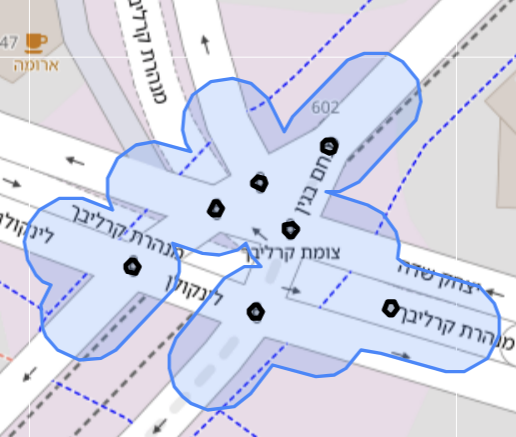<br>
    * to handle it, try convex_hull to create a polygon between all residing points
    * make the points of nodes with bigger radius, 5 or more that will cover
      then merge with the crossroad_polygon
2.  too many polygons merged some of them belong to roads that are below.<br>
    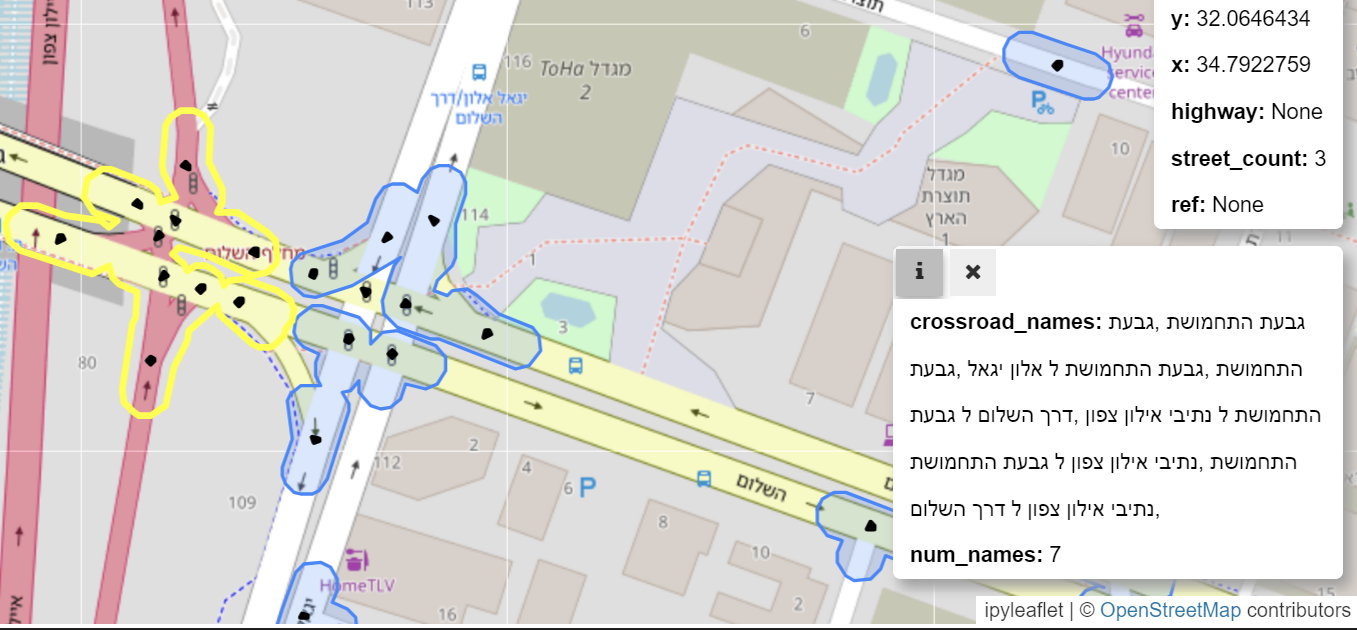<br>
    * create another crossroad_result with smaller buffer and where ever there are a lot of different roads that
      intersect with the smaller poly replace with smaller poly.
      * maybe look at the individual polygons, check the linestring that reside in all of them, if the street names go from one to the other in the area of the polygon that means they all belong to the same road (I hope)
3. very small streets that are very close by, merging creates a big blob<br>
    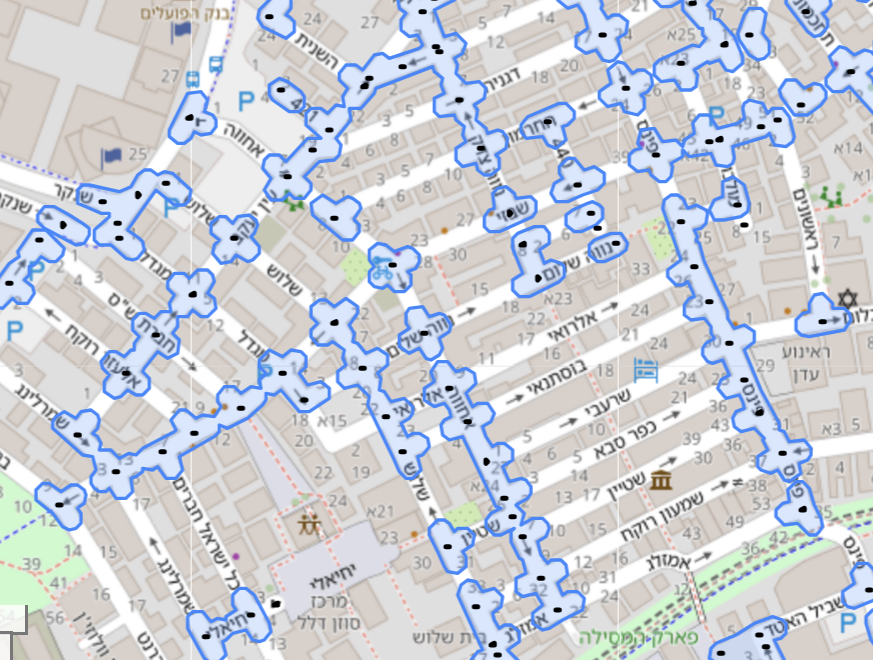<br>
    * maybe have a list of these streets and create just for them smaller buffer 

In [36]:
# m = leafmap.Map(center=(32.047, 34.785), zoom=11)
# # m.add_gdf(crossroads_result, fill_colors=['red'])
# m.add_gdf(os_ta_streets_edges[os_ta_streets_edges.edge_length < 24])
# # m.add_gdf(points_CR_w_h)
# # m.add_gdf(os_ta_streets_nodes_buff)
# m